In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import clean_columns
%matplotlib inline
from skimpy import clean_columns

In [8]:
df=pd.read_csv('students_adaptability_level_online_education.csv')
df = clean_columns(df)
df.head(50)

11 column names have been cleaned

,education_level,institution_type,gender,age,device,it_student,location,financial_condition,internet_type,network_type,flexibility_level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low
5,School,Private,Male,11,Mobile,No,Town,Poor,Mobile Data,3G,Low
6,School,Private,Male,11,Mobile,No,Town,Mid,Wifi,4G,Low
7,School,Private,Male,11,Mobile,No,Town,Mid,Wifi,4G,Moderate
8,College,Public,Male,18,Mobile,No,Town,Mid,Wifi,4G,Low
9,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   education_level      1205 non-null   object
 1   institution_type     1205 non-null   object
 2   gender               1205 non-null   object
 3   age                  1205 non-null   int64 
 4   device               1205 non-null   object
 5   it_student           1205 non-null   object
 6   location             1205 non-null   object
 7   financial_condition  1205 non-null   object
 8   internet_type        1205 non-null   object
 9   network_type         1205 non-null   object
 10  flexibility_level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [10]:
df.age = df.age.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   education_level      1205 non-null   object
 1   institution_type     1205 non-null   object
 2   gender               1205 non-null   object
 3   age                  1205 non-null   int32 
 4   device               1205 non-null   object
 5   it_student           1205 non-null   object
 6   location             1205 non-null   object
 7   financial_condition  1205 non-null   object
 8   internet_type        1205 non-null   object
 9   network_type         1205 non-null   object
 10  flexibility_level    1205 non-null   object
dtypes: int32(1), object(10)
memory usage: 99.0+ KB


In [11]:
for col in df:
    print(df[col].unique())

['University' 'College' 'School']
['Private' 'Public']
['Male' 'Female']
[23 18 11 27 10  9]
['Tab' 'Mobile' 'Computer']
['No' 'Yes']
['Town' 'Rural']
['Mid' 'Poor' 'Rich']
['Wifi' 'Mobile Data']
['4G' '3G' '2G']
['Moderate' 'Low' 'High']


In [12]:
df.describe()

,age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


In [13]:
df.shape

(1205, 11)

In [14]:
df.isnull().sum()

education_level        0
institution_type       0
gender                 0
age                    0
device                 0
it_student             0
location               0
financial_condition    0
internet_type          0
network_type           0
flexibility_level      0
dtype: int64

In [15]:
miss = pd.DataFrame((df.isna().sum() / df.isna().count()) * 100).rename(columns={0:'percent_missing'}).sort_values(by='percent_missing')
miss[miss['percent_missing'] > 0]

,percent_missing


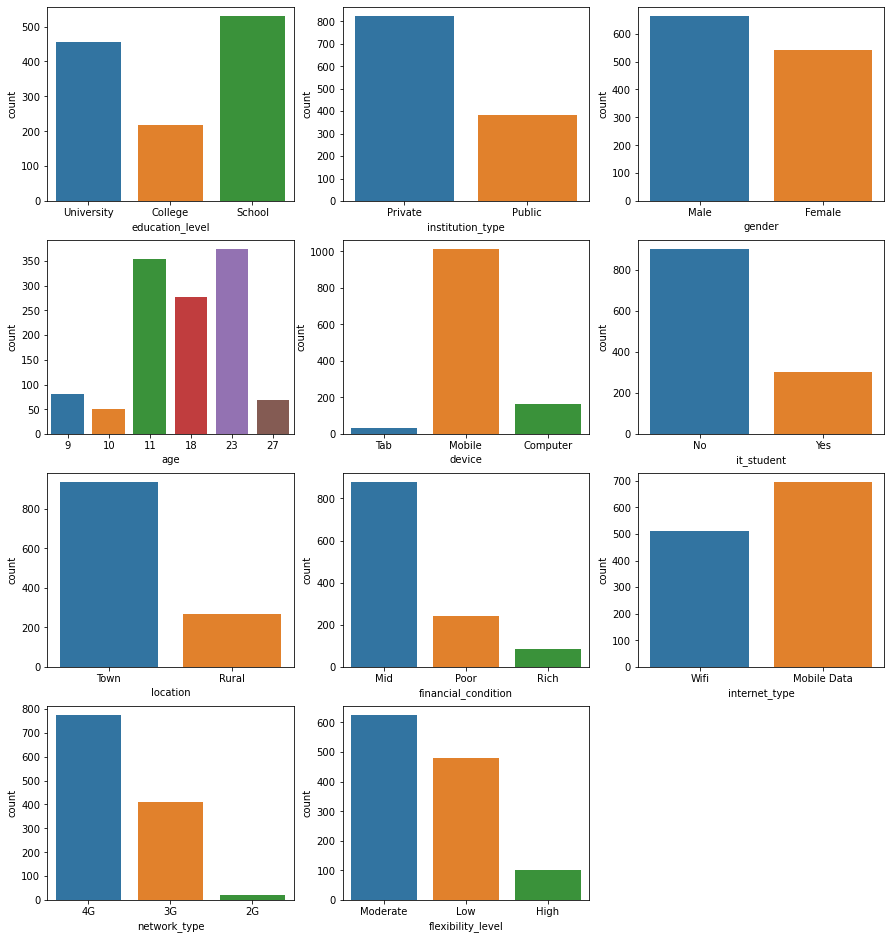

In [16]:
i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

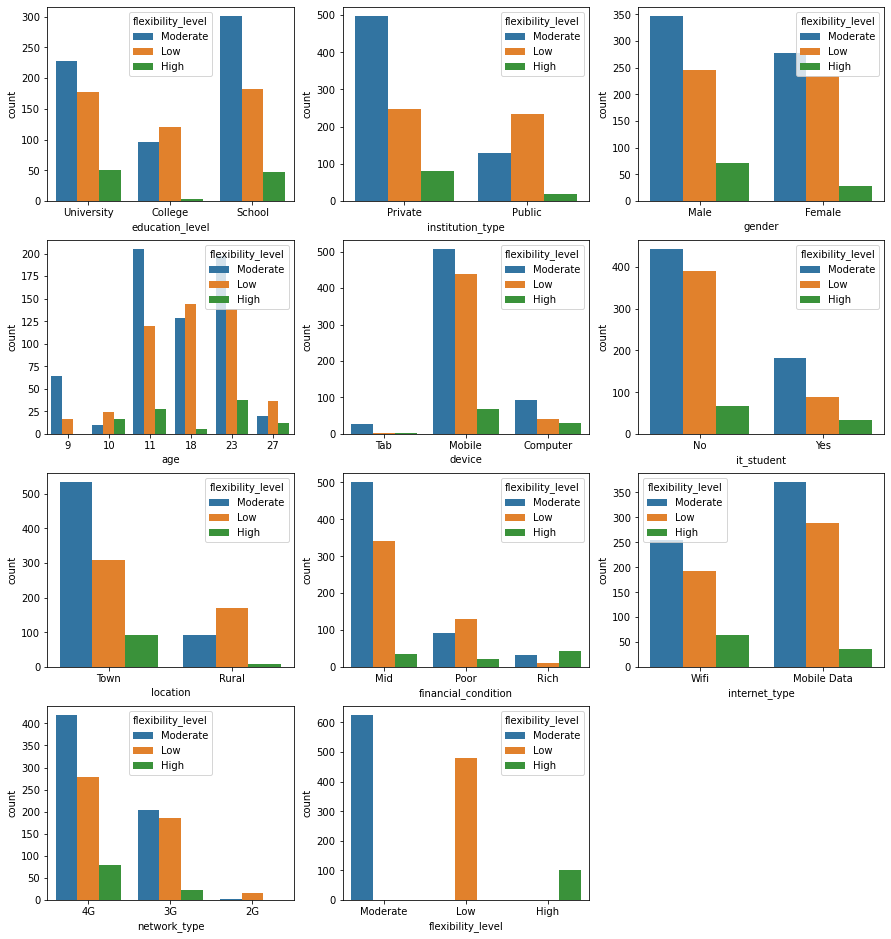

In [17]:
i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='flexibility_level', data = df)
    i +=1

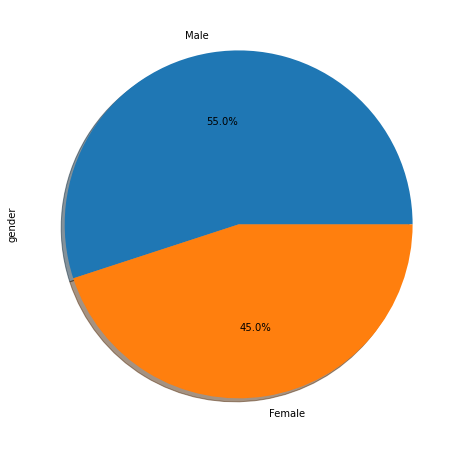

In [18]:
plt.figure(figsize=(12,8))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

C:\Users\Bradley\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


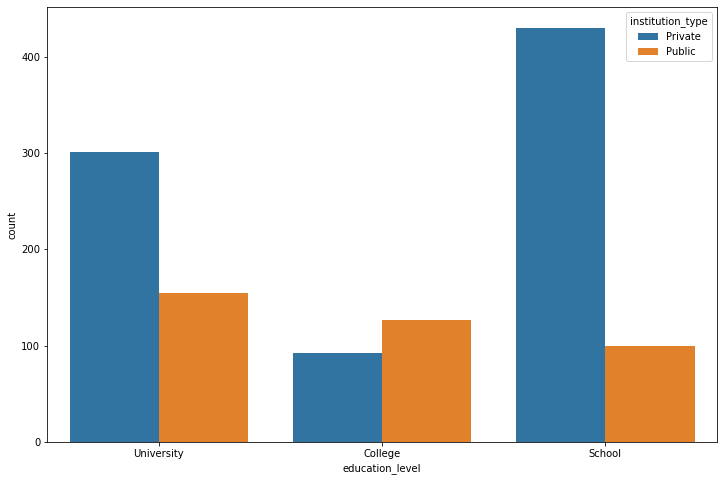

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(df["education_level"],hue=df["institution_type"])
plt.show()

C:\Users\Bradley\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


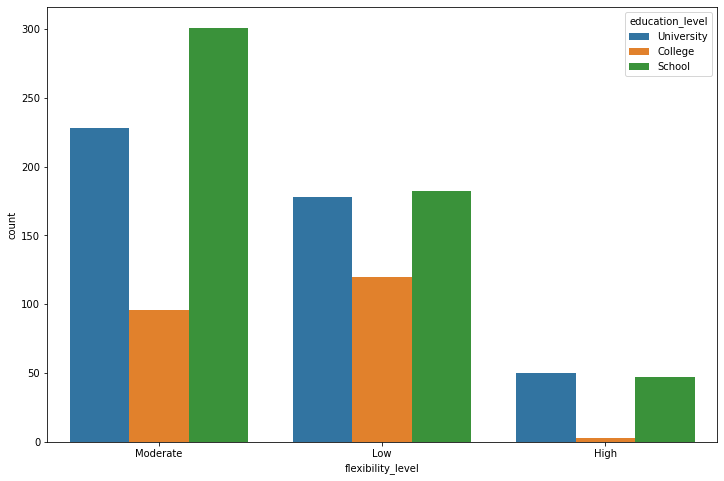

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df["flexibility_level"],hue=df["education_level"])
plt.show()

C:\Users\Bradley\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


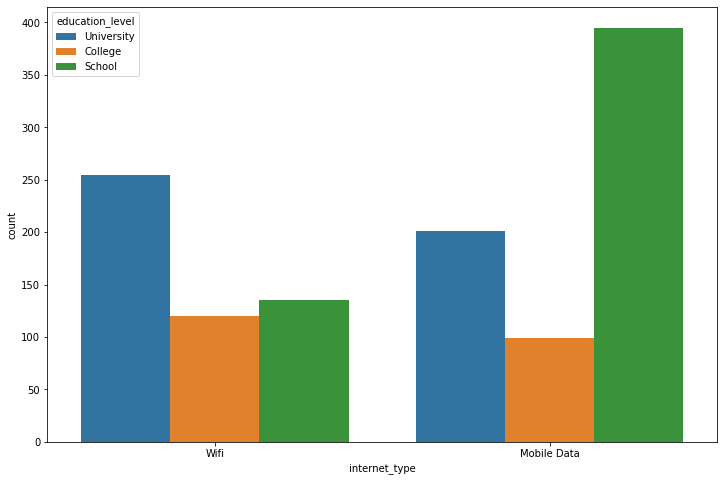

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(df["internet_type"],hue=df["education_level"])
plt.show()

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
# replacing values
df['flexibility_level'].replace(['Low', 'Moderate','High'],
                        [0, 1, 2], inplace=True)

In [24]:
df.head()

,education_level,institution_type,gender,age,device,it_student,location,financial_condition,internet_type,network_type,flexibility_level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,1
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,1
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,1
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,1
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,0


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
X = df.drop('flexibility_level',axis=1)
y = df['flexibility_level']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [30]:
numerical_transformer = Pipeline([('scaler', StandardScaler())])

In [43]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),# columns which are being one hot encoded
('num_tnf', numerical_transformer, [3])#numerical features which are being scaled
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = LogisticRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.6574585635359116


In [44]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),# columns which are being one hot encoded
('num_tnf', numerical_transformer, [3]) #numerical features which are being scaled
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = DecisionTreeClassifier(max_depth=13)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.8176795580110497


In [45]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),# columns which are being one hot encoded
('num_tnf', numerical_transformer, [3]) #numerical features which are being scaled
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = RandomForestClassifier(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.8232044198895028


In [111]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = GradientBoostingClassifier(n_estimators=500,max_features=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.8066298342541437


In [112]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = AdaBoostClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.6187845303867403


In [46]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = ExtraTreesClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.8121546961325967


In [47]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = KNeighborsClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.7403314917127072


In [115]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')

# Pipeline to transform the numerical features.

step2 = XGBClassifier(n_estimators=12,max_depth=9,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.8121546961325967


# Voting classifier

In [48]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

In [49]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')


rf = RandomForestClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingClassifier(n_estimators=500,max_features=0.5)
xgb = XGBClassifier(n_estimators=12,max_depth=9,learning_rate=1.0)
et = ExtraTreesClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)
dt = DecisionTreeClassifier(max_depth=13)


step2 = VotingClassifier([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et), ('dt',dt)],weights=[5,1,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.8232044198895028


# stacking Classifier.

In [50]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')

rf = RandomForestClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingClassifier(n_estimators=500,max_features=0.5)
xgb = XGBClassifier(n_estimators=12,max_depth=9,learning_rate=1.0)
et = ExtraTreesClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)
dt = DecisionTreeClassifier(max_depth=13)


step2 = StackingClassifier([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et), ('dt',dt)])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train.values,y_train)

y_pred = pipe.predict(X_test.values)
print('AUC',accuracy_score(y_test.values,y_pred))

AUC 0.8121546961325967


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [52]:
step1 = ColumnTransformer(transformers=[
('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,2,4,5,6,7,8,9]),
('num_tnf', numerical_transformer, [3])
], remainder='passthrough')

rf = RandomForestClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingClassifier(n_estimators=500,max_features=0.5)
xgb = XGBClassifier(n_estimators=12,max_depth=9,learning_rate=1.0)
et = ExtraTreesClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)
dt = DecisionTreeClassifier(max_depth=13)

StackingClassifier = StackingClassifier([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et), ('dt',dt)])

# Create the pipeline
pipeline = Pipeline([
    ('step1', step1),
    ('StackingClassifier', StackingClassifier)
])

# Use cross-validation to evaluate the pipeline
scores = cross_val_score(pipeline, X.values, y, cv=13, scoring='accuracy')
print(np.round(np.mean(scores),2))

0.82


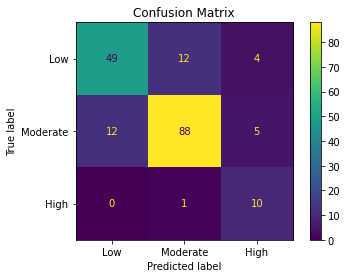

In [56]:
cm = confusion_matrix(pipe.predict(X_test.values),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Low', 'Moderate','High'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [122]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [123]:
df

,education_level,institution_type,gender,age,device,it_student,location,financial_condition,internet_type,network_type,flexibility_level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,1
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,1
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,1
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,1
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,0
...,...,...,...,...,...,...,...,...,...,...,...
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,0
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,1
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,1
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,0


In [124]:
X_train

,education_level,institution_type,gender,age,device,it_student,location,financial_condition,internet_type,network_type
1091,School,Private,Male,11,Mobile,No,Town,Poor,Mobile Data,3G
90,University,Private,Male,23,Mobile,No,Rural,Mid,Mobile Data,4G
309,University,Public,Male,23,Mobile,Yes,Town,Mid,Mobile Data,3G
782,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,4G
212,College,Public,Female,18,Mobile,No,Rural,Mid,Mobile Data,3G
...,...,...,...,...,...,...,...,...,...,...
466,College,Public,Male,23,Mobile,No,Rural,Poor,Mobile Data,3G
299,School,Private,Male,11,Mobile,No,Town,Mid,Wifi,4G
493,University,Private,Female,23,Computer,Yes,Town,Rich,Wifi,4G
527,University,Private,Male,23,Computer,Yes,Town,Mid,Wifi,4G
